# Regression with Multi-Layer Perceptron (MLP) 

In [28]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%autoreload 2

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
plt.style.use(['dark_background'])

In [21]:
x = np.ones((1,40))*np.linspace(0, 1, 40).reshape((1,40))

In [22]:
t = np.sin(2*np.pi*x) + np.cos(4*np.pi*x) + np.random.randn(40)*0.2
t = t.T

In [23]:
x = x.T

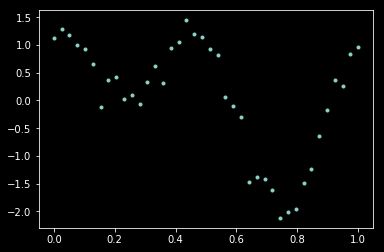

In [24]:
plt.plot(x, t, '.')

In [25]:
x = (x - x.mean(axis=0))/x.std(axis=0)

In [26]:
train = x[::2, :]
test= x[1::4, :]
valid = x[3::4, :]
traintarget = t[::2, :]
testtarget = t[1::4, :]
validtarget = t[3::4, :]

In [30]:
import mlp

In [31]:
net = mlp.mlp(train, traintarget, 3, outtype='linear')
net.mlptrain(train, traintarget, 0.25, 101)

Iteration:  0  Error:  14.423220959799158
Iteration:  100  Error:  6.48692745234478


In [38]:
nodes = [1, 2, 3, 5, 10, 25, 50]

for i in nodes:
    net = mlp.mlp(train, traintarget,i, outtype='linear')
    net.mlptrain(train, traintarget, 0.25, 10)

Iteration:  0  Error:  18.649161382975514
Iteration:  0  Error:  9.650445232103053
Iteration:  0  Error:  14.692146841224227
Iteration:  0  Error:  13.49365211410742
Iteration:  0  Error:  11.38602574516327
Iteration:  0  Error:  11.616324766671223
Iteration:  0  Error:  12.43463769910857


In [37]:
train.shape

(20, 1)

# Classification with MLP

In [39]:
def preprocessIris(infile, outfile):
    stext1 = 'Iris-setosa'
    stext2 = 'Iris-versicolor'
    stext3 = 'Iris-virginica'
    rtext1 = '0'
    rtext2 = '1'
    rtext3 = '2'
    fid = open(infile, 'r')
    oid = open(outfile, 'w')
    
    for s in fid:
        if s.find(stext1) > -1:
            oid.write(s.replace(stext1, rtext1))
        if s.find(stext2) > -1:
            oid.write(s.replace(stext2, rtext2))
        if s.find(stext3) > -1:
            oid.write(s.replace(stext3, rtext3))
    fid.close()
    oid.close()

In [41]:
preprocessIris('iris.data.txt', 'iris_proc.data.txt')

In [42]:
iris = np.loadtxt('iris_proc.data.txt', delimiter=',')

In [43]:
iris[:, :4] = iris[:, :4] - iris[:, :4].mean(axis=0)
imax = np.concatenate((iris.max(axis=0)*np.ones((1,5)), np.abs(iris.min(
axis=0))*np.ones((1,5))), axis=0).max(axis=0)
iris[:, :4] = iris[:, :4]/imax[:4]

In [44]:
iris[0:5, :]

array([[-0.36142626,  0.33135215, -0.7508489 , -0.76741803,  0.        ],
       [-0.45867099, -0.04011887, -0.7508489 , -0.76741803,  0.        ],
       [-0.55591572,  0.10846954, -0.78268251, -0.76741803,  0.        ],
       [-0.60453809,  0.03417533, -0.71901528, -0.76741803,  0.        ],
       [-0.41004862,  0.40564636, -0.7508489 , -0.76741803,  0.        ]])

In [49]:
target = np.zeros((np.shape(iris)[0], 3))
indices = np.where(iris[:,4]==0)
target[indices, 0] = 1
indices = np.where(iris[:,4]==1)
target[indices, 1] = 1
indices = np.where(iris[:,4] ==2)
target[indices, 2] = 1


In [50]:
target[:4]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [51]:
target[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [59]:
order = np.arange(np.shape(iris)[0])

In [60]:
np.random.shuffle(order)

In [62]:
iris = iris[order,:]
target = target[order, :]

In [63]:
x_train = iris[::2, 0:4]
y_train = target[::2]
x_val = iris[1::4, 0:4]
y_val  = target[1::4]
x_test = iris[3::4, :4]
y_test = target[3::4]

In [64]:
net = mlp.mlp(x_train, y_train, 5, outtype='softmax')
net.earlystopping(x_train, y_train, x_val, y_val, 0.1)
net.confmat(x_test, y_test)

1
Iteration:  0  Error:  25.862895425585585
2
Iteration:  0  Error:  20.242453697638048
3
Iteration:  0  Error:  10.074320454247072
4
Iteration:  0  Error:  6.0240655851468095
5
Iteration:  0  Error:  4.084276428997572
6
Iteration:  0  Error:  3.073449303449884
7
Iteration:  0  Error:  2.4732237158040578
8
Iteration:  0  Error:  2.0809750930614785
9
Iteration:  0  Error:  1.8074121663635405
10
Iteration:  0  Error:  1.60750391162557
11
Iteration:  0  Error:  1.4560915309303541
12
Iteration:  0  Error:  1.3380514555121015
13
Iteration:  0  Error:  1.2437907413606353
14
Iteration:  0  Error:  1.1669667147919822
15
Iteration:  0  Error:  1.1032423505070983
16
Iteration:  0  Error:  1.0495671757791867
17
Iteration:  0  Error:  1.0037428979632053
18
Iteration:  0  Error:  0.9641513481234285
19
Iteration:  0  Error:  0.9295788130033553
20
Iteration:  0  Error:  0.8990995765484566
21
Iteration:  0  Error:  0.8719969003788708
22
Iteration:  0  Error:  0.8477082837884109
23
Iteration:  0  Error

# Time-Series with MLP

Text(0,0.5,'Ozone (dobson units)')

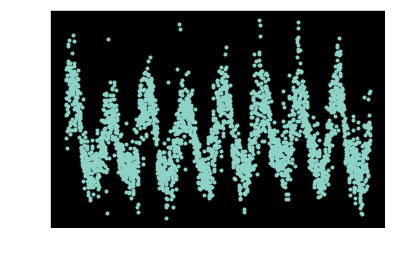

In [82]:
plt.plot(np.arange(np.shape(PNoz)[0]), PNoz[:,2], '.')
plt.xlabel('Time (days)')
plt.ylabel("Ozone (dobson units)")


In [68]:
PNoz.shape

(2855, 4)

Text(0,0.5,'Sulfur Dioxide level')

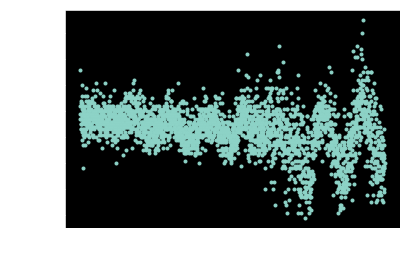

In [84]:
plt.plot(np.arange(np.shape(PNoz)[0]), PNoz[:,3], '.')
plt.xlabel('Time (days)')
plt.ylabel("Sulfur Dioxide level")

In [98]:
PNoz = np.loadtxt('PNoz.dat.txt')

In [99]:
PNoz[:, 2] = PNoz[:,2] - PNoz[:, 2].mean()
PNoz[:, 2] = PNoz[:, 2]/PNoz[:, 2].max()

In [100]:
t = 2
k = 3

In [101]:
lastPoint = np.shape(PNoz)[0]-t*(k+1)
inputs = np.zeros((lastPoint,k))
targets = np.zeros((lastPoint,1))
for i in range(lastPoint):
    inputs[i,:] = PNoz[i:i+t*k:t,2]
    targets[i] = PNoz[i+t*(k+1),2]

In [102]:
test = inputs[-400:, :]
testtargets = targets[-400:]
testtargets = testtargets.reshape(-1, 1)
train = inputs[:-400:2, :]
traintargets= targets[:-400:2].reshape(-1, 1)
valid = inputs[1:-400:2, :]
validtargets = targets[1:-400:2].reshape(-1, 1)

In [103]:
change = np.arange(np.shape(inputs)[0])
np.random.shuffle(change)
inputs = inputs[change, :]
targets = targets[change, :]

In [104]:
net = mlp.mlp(train, traintargets, 3, outtype='linear')
net.earlystopping(train, traintargets, valid, validtargets, 0.1)

1
Iteration:  0  Error:  351.2815475767288
2
Iteration:  0  Error:  20.820989764863018
3
Iteration:  0  Error:  20.675497645145025
4
Iteration:  0  Error:  20.57717337394977
5
Iteration:  0  Error:  20.507105914266667
6
Iteration:  0  Error:  20.456365916218072
7
Iteration:  0  Error:  20.418972835445373
8
Iteration:  0  Error:  20.390839089823018
9
Iteration:  0  Error:  20.36913923955174
10
Iteration:  0  Error:  20.351908826969158
11
Iteration:  0  Error:  20.337778092138663
12
Iteration:  0  Error:  20.32579051944265
13
Iteration:  0  Error:  20.315277436130096
14
Iteration:  0  Error:  20.305770799201866
15
Iteration:  0  Error:  20.296942425319667
16
Iteration:  0  Error:  20.288561656072012
17
Iteration:  0  Error:  20.28046589541513
18
Iteration:  0  Error:  20.272540125966245
19
Iteration:  0  Error:  20.264702677001907
20
Iteration:  0  Error:  20.256895337826904
21
Iteration:  0  Error:  20.24907648789808
22
Iteration:  0  Error:  20.241216320271167
23
Iteration:  0  Error: 

21.127896226486612

In [105]:
test = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)
testout = net.mlpfwd(test)

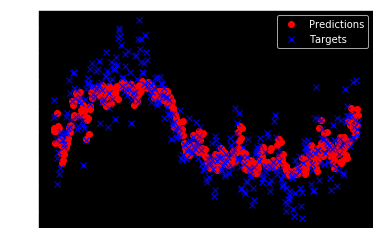

In [109]:
plt.plot(np.arange(np.shape(test)[0]), testout, 'ro')
plt.plot(np.arange(np.shape(test)[0]), testtargets, 'bx')
plt.legend(("Predictions", "Targets"))

In [108]:
print(0.5*np.sum((testtargets-testout)**2))

6.574872130377032


In [2]:
import matplotlib.pyplot as plt

Text(0.5,1,'blah')

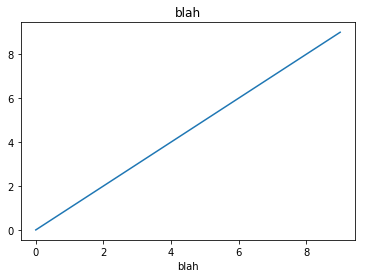

In [6]:
plt.plot(range(10))
plt.xlabel('blah')
plt.title('blah')